Spatial aggregation

In [1]:
import pandas as pd
data = pd.read_csv('Data.csv')
average_pm25_by_state = data.groupby('state')['PM2.5'].mean().reset_index()
highest_pm25_state = average_pm25_by_state.loc[average_pm25_by_state['PM2.5'].idxmax()]
print("State with the highest average PM2.5 concentration:")
print(highest_pm25_state)
print(data)



State with the highest average PM2.5 concentration:
state         Delhi
PM2.5    104.100918
Name: 6, dtype: object
          Timestamp                           station  PM2.5        PM10  \
0        2017-01-01        32Bungalows, Bhilai - CECB    NaN         NaN   
1        2017-01-01              AIIMS, Raipur - CECB    NaN         NaN   
2        2017-01-01      Adarsh Nagar, Jaipur - RSPCB    NaN         NaN   
3        2017-01-01        Airoli, Navi Mumbai - MPCB    NaN   54.743723   
4        2017-01-01        Airport Area, Indore - IMC    NaN         NaN   
...             ...                               ...    ...         ...   
1627456  2024-12-10              Worli, Mumbai - MPCB  54.71  124.420000   
1627457  2024-12-10  Yamunapuram, Bulandshahr - UPPCB  53.23  101.340000   
1627458  2024-12-10   Yerramukkapalli, Kadapa - APPCB  75.00  110.750000   
1627459  2024-12-10  Zero Point GICI, Gangtok - SSPCB    NaN         NaN   
1627460  2024-12-10       Zoo Park, Hyderabad - T

In [2]:
import pandas as pd
data = pd.read_csv('Data.csv')
new_data = data['Timestamp'].str.split('-', expand=True)
new_data.columns = ['year', 'month', 'date']
data = pd.concat([data, new_data], axis=1)
data_2023 = data[data['year'] == '2023']
hazardous_data = data_2023[data_2023['PM2.5'] > 300]
group = hazardous_data.groupby('state').size().reset_index(name='hazardous_day')
most_hazardous_state = group.loc[group['hazardous_day'].idxmax()]
print(most_hazardous_state)



state            Delhi
hazardous_day      470
Name: 3, dtype: object


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("Data.csv")
new_data = data["Timestamp"].str.split("-", expand=True)
new_data.columns = ["year", "month", "date"]
new_data["year"] = new_data["year"].astype(int)
new_data["month"] = new_data["month"].astype(int)

data = pd.concat([data, new_data], axis=1)


df_2023 = data[data["year"] == 2023]


variability_by_state = df_2023.groupby("state")["PM2.5"].std()


highest_variability_state = variability_by_state.idxmax()
highest_variability_value = variability_by_state.max()

print(f"State with highest PM2.5 variability in 2023: {highest_variability_state}")
print(f"Standard Deviation: {highest_variability_value:.2f}")


State with highest PM2.5 variability in 2023: Delhi
Standard Deviation: 82.80


In [4]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
filtered_df = df[(df['Timestamp'].dt.year.isin([2020,2021]))]
PS_df = filtered_df[["state","PM2.5"]].copy()
PS_df.dropna(inplace=True)
merged_df = PS_df.groupby("state", as_index=False)["PM2.5"].mean()
print("State having lowest PM2.5 value:", merged_df.loc[merged_df["PM2.5"].idxmin(),"state"])

State having lowest PM2.5 value: Mizoram


Temporal aggregation

In [5]:
import pandas as pd
df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
target_month = 8
target_year = 2020
filtered_df = df[(df['Timestamp'].dt.month == target_month) & (df['Timestamp'].dt.year == target_year)]
max_pm25_station = filtered_df.loc[filtered_df['PM2.5'].idxmax(), ['station', 'PM2.5']]
#['station', 'PM2.5']  are used to give only station and PM2.5 values insted of all the row of that station
print("Station with the highest PM 2.5 in August 2020:")
print(max_pm25_station)

Station with the highest PM 2.5 in August 2020:
station    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                             805.51
Name: 737399, dtype: object


In [6]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('Data.csv')

# Split the Timestamp column into year, month, and date
new_data = data['Timestamp'].str.split('-', expand=True)
new_data.columns = ['year', 'month', 'date']

# Convert year and month to integers
new_data['year'] = new_data['year'].astype(int)
new_data['month'] = new_data['month'].astype(int)

# Concatenate the new columns to the original dataframe
data = pd.concat([data, new_data], axis=1)

# Filter data for the year 2018
data_2018 = data[data['year'] == 2018]

# Filter data for the specific station
station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
data_2018 = data_2018[data_2018['station'] == station_name]

# Filter data by seasons
data_winter = data_2018[data_2018['month'].isin([1, 2, 12])]
data_summer = data_2018[data_2018['month'].isin([3, 4, 5])]
data_monsoon = data_2018[data_2018['month'].isin([6, 7, 8, 9])]

# Calculate the average PM2.5 concentration for each season
winter_avg = data_winter['PM2.5'].mean()
summer_avg = data_summer['PM2.5'].mean()
monsoon_avg = data_monsoon['PM2.5'].mean()

# Identify the most polluted season
seasonal_averages = {'Winter': winter_avg, 'Summer': summer_avg, 'Monsoon': monsoon_avg}
most_polluted_season = max(seasonal_averages, key=seasonal_averages.get)

# Print results
print(f"Winter PM2.5 Average: {winter_avg}")
print(f"Summer PM2.5 Average: {summer_avg}")
print(f"Monsoon PM2.5 Average: {monsoon_avg}")
print(f"Most Polluted Season: {most_polluted_season}")




Winter PM2.5 Average: 67.4923443634478
Summer PM2.5 Average: nan
Monsoon PM2.5 Average: 34.42519611317571
Most Polluted Season: Winter


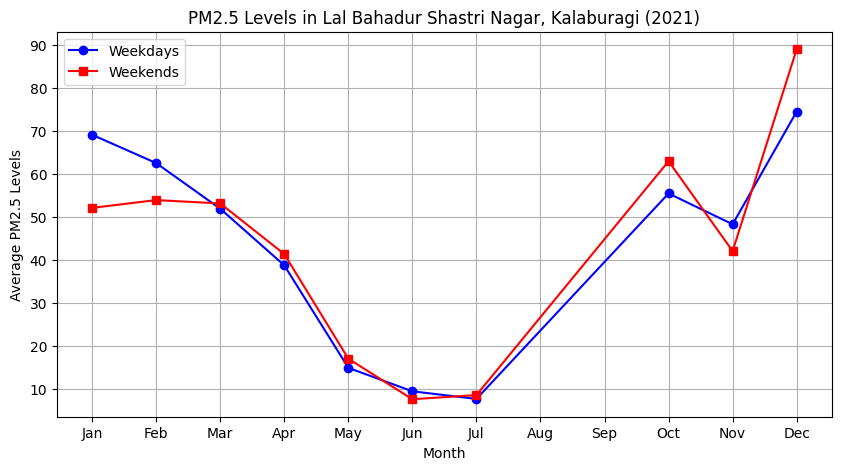

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("Data.csv")

# Split the Timestamp column into year, month, and date
new_data = data["Timestamp"].str.split("-", expand=True)
new_data.columns = ["year", "month", "date"]

# Convert year and month to integers
new_data["year"] = new_data["year"].astype(int)
new_data["month"] = new_data["month"].astype(int)

# Concatenate the new columns to the original dataframe
data = pd.concat([data, new_data], axis=1)

# Convert Timestamp to datetime format
data["Timestamp"] = pd.to_datetime(data["Timestamp"], errors="coerce")

# Filter data for the year 2021 and specific station
df_2021 = data[(data["year"] == 2021) &
               (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")].copy()

# Extract day of the week (Monday=0, Sunday=6) and classify as Weekday or Weekend
df_2021["WeekType"] = np.where(df_2021["Timestamp"].dt.dayofweek < 5, "Weekday", "Weekend")

# Compute monthly average PM2.5 for weekdays and weekends
monthly_avg_pm25 = df_2021.pivot_table(index="month", columns="WeekType", values="PM2.5", aggfunc=np.nanmean)

# --- Plot the Trends ---
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekday"], marker='o', linestyle='-', label="Weekdays", color='blue')
plt.plot(monthly_avg_pm25.index, monthly_avg_pm25["Weekend"], marker='s', linestyle='-', label="Weekends", color='red')

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Levels")
plt.title("PM2.5 Levels in Lal Bahadur Shastri Nagar, Kalaburagi (2021)")
plt.xticks(ticks=np.arange(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True)
plt.show()



spatio-temporal aggregation

In [8]:
import pandas as pd

df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

filtered_df1 = df[(df['Timestamp'].dt.month.isin([3, 4, 5])) & (df['Timestamp'].dt.year == 2022)]
PS_df1 = filtered_df1[["state", "PM2.5"]].copy()
PS_df1.dropna(inplace=True)
merged_df1 = PS_df1.groupby("state", as_index=False)["PM2.5"].mean()
merged_df1["Percentage1"] = merged_df1["PM2.5"] / 100

filtered_df2 = df[(df['Timestamp'].dt.month.isin([6, 7, 8, 9])) & (df['Timestamp'].dt.year == 2022)]
PS_df2 = filtered_df2[["state", "PM2.5"]].copy()
PS_df2.dropna(inplace=True)
merged_df2 = PS_df2.groupby("state", as_index=False)["PM2.5"].mean()
merged_df2["Percentage2"] = merged_df2["PM2.5"] / 100

merged_df3 = pd.merge(merged_df1[["state", "Percentage1"]], merged_df2[["state", "Percentage2"]], on="state", how="inner")
merged_df3["difference"] = merged_df3["Percentage1"] - merged_df3["Percentage2"]

print(merged_df3)
print("State having maximum difference:", merged_df3.loc[merged_df3["difference"].idxmax(), "state"])

                state  Percentage1  Percentage2  difference
0      Andhra Pradesh     0.301285     0.193555    0.107730
1   Arunachal Pradesh     0.321163     0.150699    0.170464
2               Assam     0.563376     0.218723    0.344654
3               Bihar     0.758349     0.356424    0.401925
4          Chandigarh     0.596959     0.327586    0.269373
5        Chhattisgarh     0.223216     0.198717    0.024499
6               Delhi     0.956676     0.427696    0.528981
7             Gujarat     0.651131     0.358527    0.292604
8             Haryana     0.817277     0.419225    0.398052
9    Himachal Pradesh     0.614719     0.386861    0.227858
10  Jammu and Kashmir     0.180502     0.180496    0.000006
11          Karnataka     0.333878     0.165274    0.168604
12             Kerala     0.338492     0.288529    0.049963
13     Madhya Pradesh     0.513694     0.224733    0.288961
14        Maharashtra     0.537086     0.254006    0.283080
15            Manipur     0.177334     0

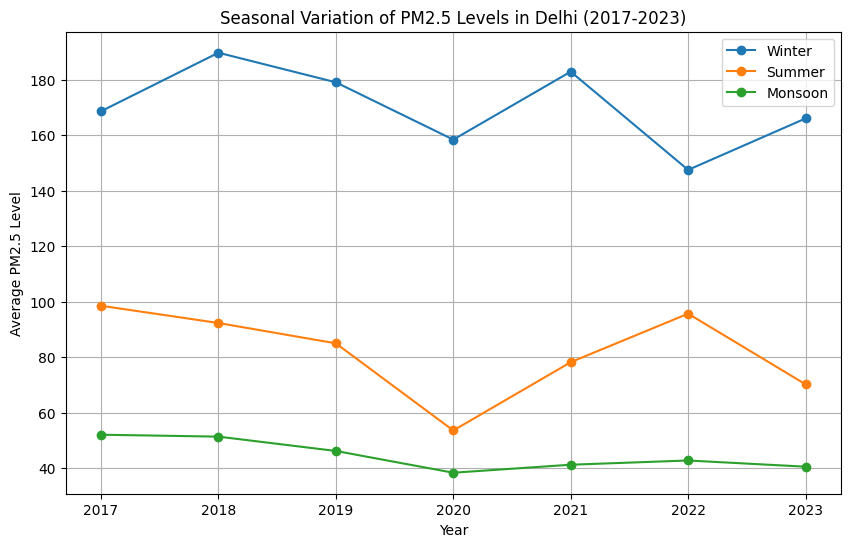

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('Data.csv')

# Split the Timestamp column into year, month, and date
new_data = data['Timestamp'].str.split('-', expand=True)
new_data.columns = ['year', 'month', 'date']

# Convert year and month to integers
new_data['year'] = new_data['year'].astype(int)
new_data['month'] = new_data['month'].astype(int)

# Concatenate the new columns to the original dataframe
data = pd.concat([data, new_data], axis=1)

# Filter data for the years 2017-2023
data_filtered = data[data['year'].isin([2017, 2018, 2019, 2020, 2021, 2022, 2023])]

# Filter data for Delhi
data_filtered = data_filtered[data_filtered['state'] == 'Delhi']

# Filter data by seasons
data_winter = data_filtered[data_filtered['month'].isin([12, 1, 2])]
data_summer = data_filtered[data_filtered['month'].isin([3, 4, 5])]
data_monsoon = data_filtered[data_filtered['month'].isin([6, 7, 8, 9])]

# Calculate average PM2.5 for each season per year
seasonal_pm25 = {
    'Year': data_filtered['year'].unique(),
    'Winter': data_winter.groupby('year')['PM2.5'].mean().values,
    'Summer': data_summer.groupby('year')['PM2.5'].mean().values,
    'Monsoon': data_monsoon.groupby('year')['PM2.5'].mean().values
}

# Convert to DataFrame
seasonal_pm25_df = pd.DataFrame(seasonal_pm25)

# Plot the data using Pandas
ax = seasonal_pm25_df.set_index('Year').plot(kind='line', marker='o', figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Average PM2.5 Level')
ax.set_title('Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)')
plt.grid(True)
plt.show()

Standard Deviation - Delhi: 11.717413923558443, Mumbai: 6.271046653393212
Mean Yearly Change - Delhi: 9.08855016171885, Mumbai: 3.8439143359681887


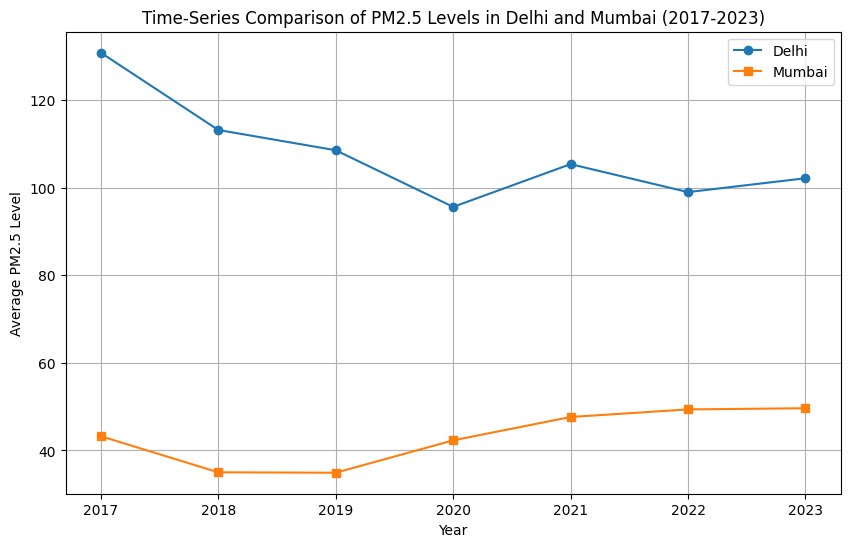

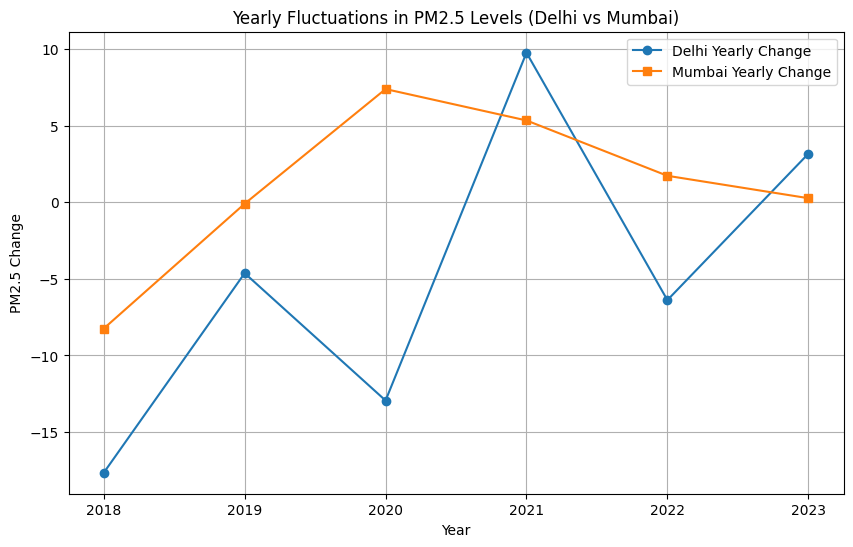

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
data = pd.read_csv('Data.csv')

# Split the Timestamp column into year, month, and date
new_data = data['Timestamp'].str.split('-', expand=True)
new_data.columns = ['year', 'month', 'date']

# Convert year and month to integers
new_data['year'] = new_data['year'].astype(int)
new_data['month'] = new_data['month'].astype(int)

# Concatenate the new columns to the original dataframe
data = pd.concat([data, new_data], axis=1)

new_data = data[data['year'].isin([2017, 2018, 2019, 2020, 2021, 2022, 2023])]

data_delhi = new_data[new_data['city'] == 'Delhi']
data_mumbai = new_data[new_data['city'] == 'Mumbai']
delhi_pm25 = data_delhi.groupby('year')['PM2.5'].mean()
mumbai_pm25 = data_mumbai.groupby('year')['PM2.5'].mean()

delhi_std = delhi_pm25.std()
mumbai_std = mumbai_pm25.std()
delhi_diff = delhi_pm25.diff().abs().mean()
mumbai_diff = mumbai_pm25.diff().abs().mean()

print(f"Standard Deviation - Delhi: {delhi_std}, Mumbai: {mumbai_std}")
print(f"Mean Yearly Change - Delhi: {delhi_diff}, Mumbai: {mumbai_diff}")
plt.figure(figsize=(10, 6))
plt.plot(delhi_pm25.index, delhi_pm25.values, marker='o', linestyle='-', label='Delhi')
plt.plot(mumbai_pm25.index, mumbai_pm25.values, marker='s', linestyle='-', label='Mumbai')
plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Time-Series Comparison of PM2.5 Levels in Delhi and Mumbai (2017-2023)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the yearly change to visualize fluctuations
plt.figure(figsize=(10, 6))
plt.plot(delhi_pm25.index, delhi_pm25.diff(), marker='o', linestyle='-', label='Delhi Yearly Change')
plt.plot(mumbai_pm25.index, mumbai_pm25.diff(), marker='s', linestyle='-', label='Mumbai Yearly Change')
plt.xlabel('Year')
plt.ylabel('PM2.5 Change')
plt.title('Yearly Fluctuations in PM2.5 Levels (Delhi vs Mumbai)')
plt.legend()
plt.grid(True)
plt.show()



Population-based

In [11]:
import numpy as np
import pandas as pd
stations_df = pd.read_csv("Data.csv")
population_df = pd.read_csv("State_data.csv")
station_count = stations_df["state"].value_counts().reset_index()
# counts the no.of rows contain the same state
#.reset index gives indexes for the states
station_count.columns = ["State", "Total_Stations"]
pop_df = population_df[["State", "Population"]]
merged_df = pd.merge(station_count, pop_df, on="State")
# merges both based on states
merged_df["Stations_per_Million"] = merged_df["Total_Stations"] / (merged_df["Population"] / 1_000_000)
max_state = merged_df.loc[merged_df["Stations_per_Million"].idxmax()]
# .idmax - Finds the index of the row where "Stations_per_Million" is maximum.
#.loc[] is used to access a row in a DataFrame by index
print("State with highest monitoring stations per million people:")
print(max_state[["State", "Stations_per_Million"]])


State with highest monitoring stations per million people:
State                    Chandigarh
Stations_per_Million    8245.771946
Name: 19, dtype: object



Top 5 Polluted States:
         State      PM2.5  Population  PM2.5_per_Capita
4   Chandigarh  59.414055   1055450.0         56.292629
24      Sikkim  14.927530    610577.0         24.448235
27     Tripura  80.469872   3673917.0         21.903018
21  Puducherry  24.286078   1247953.0         19.460731
19    Nagaland  32.721157   1978502.0         16.538349


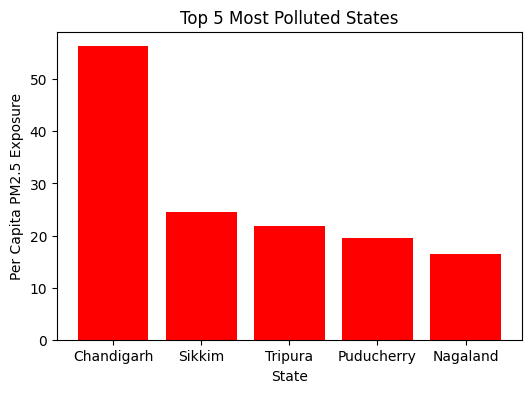

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")
population_df = pd.read_csv("State_data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
filtered_df = df[df['Timestamp'].dt.year == 2023]

state_pm = filtered_df[["state", "PM2.5"]].copy()   #.copy() creates a new independent DataFrame instead of a view of the original df_filtered.
state_pm.columns = ["State", "PM2.5"]
state_pm.dropna(inplace=True)   #removes rows with NaN (missing) values

pop_df = population_df[["State", "Population"]].copy()
pop_df.dropna(inplace=True)

merged_df = pd.merge(state_pm, pop_df, on="State", how="inner")   #how="inner" in pd.merge() keeps only matching rows from both DataFrames
merged_df["PM2.5"] = pd.to_numeric(merged_df["PM2.5"], errors="coerce")  #merged_df["PM2.5"] = pd.to_numeric(merged_df["PM2.5"], errors="coerce")
merged_df["Population"] = pd.to_numeric(merged_df["Population"], errors="coerce")
merged_df.dropna(inplace=True)

merged_df = merged_df.groupby("State", as_index=False).mean()   #Ensures each state appears only once instead of multiple rows for the same state
                                                                # and calculates mean if the same state appears many times
merged_df["PM2.5_per_Capita"] = merged_df["PM2.5"] / (merged_df["Population"] / 1_000_000)

top_5_polluted = merged_df.sort_values(by="PM2.5_per_Capita", ascending=False).head(5)

print("\nTop 5 Polluted States:")
print(top_5_polluted)


plt.figure(figsize=(6, 4))
plt.bar(top_5_polluted["State"], top_5_polluted["PM2.5_per_Capita"], color="red", width=0.8)
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States")
plt.show()



Area Based

State containing highest PM2.5 concentration per square kilometer : Chandigarh


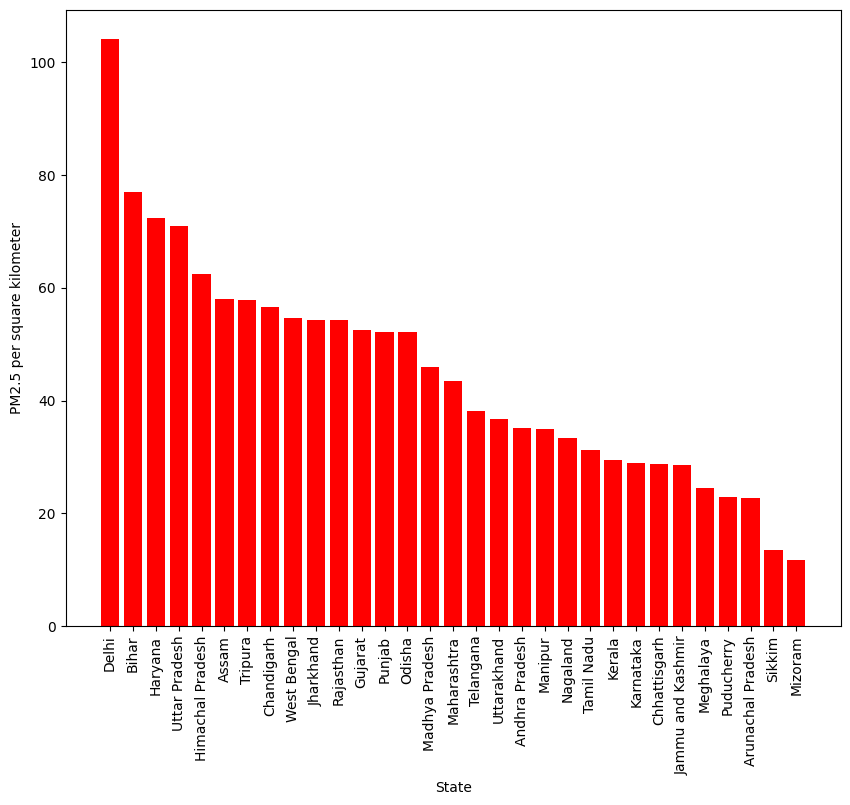

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")
squarekm_df = pd.read_csv("State_data.csv")

area_df = squarekm_df[["State", "Area (km2)"]]
state_pm = df[["state", "PM2.5"]].copy()
state_pm.columns = ["State", "PM2.5"]
state_pm.dropna(inplace=True)

merged_df = pd.merge(state_pm, area_df, on="State", how="inner")
merged_df["PM2.5"] = pd.to_numeric(merged_df["PM2.5"], errors="coerce")
merged_df["Area (km2)"] = pd.to_numeric(merged_df["Area (km2)"], errors="coerce")
merged_df.dropna(inplace=True)

merged_df = merged_df.groupby("State", as_index=False).mean()

merged_df["PM2.5_per_area"] = merged_df["PM2.5"] / merged_df["Area (km2)"]
top_polluted = merged_df.sort_values(by="PM2.5", ascending=False)

max_state = merged_df.loc[merged_df["PM2.5_per_area"].idxmax()]
print("State containing highest PM2.5 concentration per square kilometer :", max_state["State"])

plt.figure(figsize=(10, 8))
plt.bar(top_polluted["State"], top_polluted["PM2.5"], color="red")
plt.xlabel("State")
plt.ylabel("PM2.5 per square kilometer")
plt.xticks(rotation=90)
plt.show()


State with the highest density of monitoring stations: Delhi
Density: 77.96159029649596 stations per square km


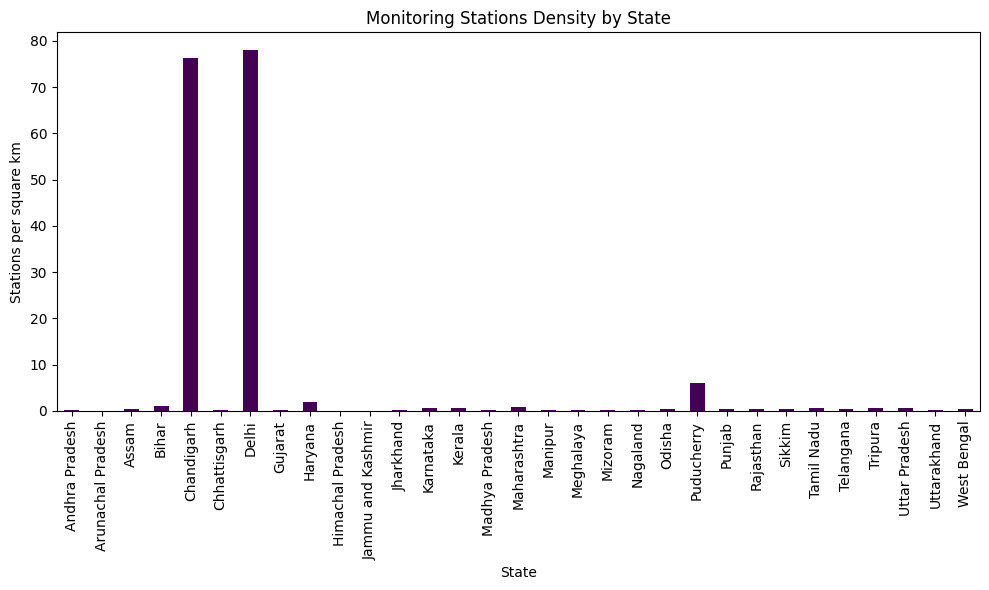

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.read_csv("Data.csv")
squarekm_df = pd.read_csv("State_data.csv")

# Extract relevant columns
area_df = squarekm_df[["State", "Area (km2)"]]
state_pm = df[["state", "station"]].copy()
state_pm.columns = ["State", "station"]
state_pm.dropna(inplace=True)

# Merge the datasets on the "State" column
merged_df = pd.merge(state_pm, area_df, on="State", how="inner")

# Count the total number of stations per state
group_data = merged_df.groupby('State')['station'].count().reset_index()
group_data.columns = ['State', 'Total_Stations']

# Merge with area data to get the area for each state
density_df = pd.merge(group_data, area_df, on="State")

# Calculate the density of monitoring stations (stations per square km)
density_df['Density'] = density_df['Total_Stations'] / density_df['Area (km2)']

# Identify the state with the highest density of monitoring stations
highest_density_state = density_df.loc[density_df['Density'].idxmax()]

print(f"State with the highest density of monitoring stations: {highest_density_state['State']}")
print(f"Density: {highest_density_state['Density']} stations per square km")

# Plot the bar chart for density of monitoring stations per state using pandas
density_df.set_index('State')['Density'].plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.xlabel('State')
plt.ylabel('Stations per square km')
plt.title('Monitoring Stations Density by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

            State  Average_PM2.5  Population_Density
0  Madhya Pradesh      47.095952          235.608557
1     Maharashtra      46.440044          365.192023


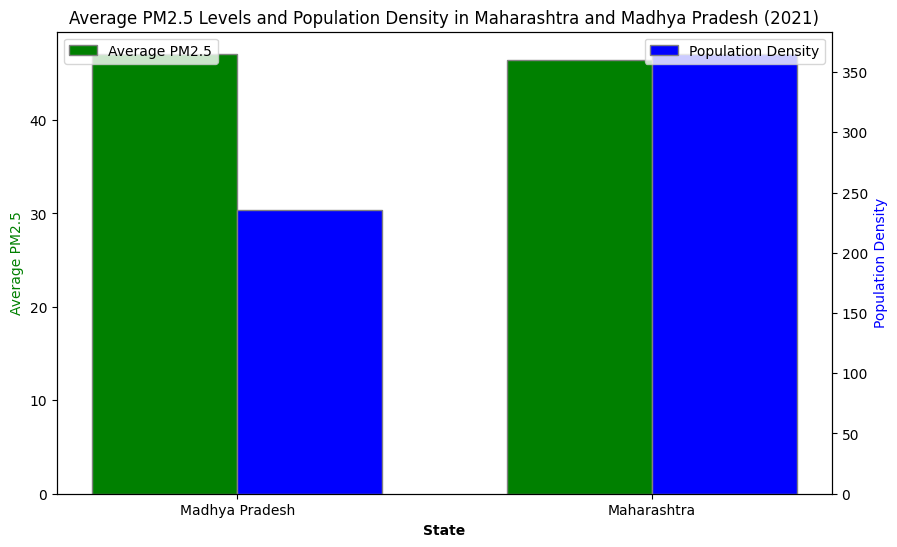

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("Data.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for the year 2021
filtered_df = df[df['Timestamp'].dt.year == 2021]

# Filter data for Maharashtra and Madhya Pradesh
states_df = filtered_df[filtered_df['state'].isin(['Maharashtra', 'Madhya Pradesh'])]

# Calculate average PM2.5 levels for each state
avg_pm25 = states_df.groupby('state')['PM2.5'].mean().reset_index()
avg_pm25.columns = ['State', 'Average_PM2.5']

# Load state data
state_data = pd.read_csv("State_data.csv")  # Assuming this file contains state data with Population and Area
state_data = state_data[state_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])]

# Calculate population density
state_data['Population_Density'] = state_data['Population'] / state_data['Area (km2)']

# Merge PM2.5 data with state data
merged_df = pd.merge(avg_pm25, state_data[['State', 'Population_Density']], on='State')

# Print the results
print(merged_df)

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Set positions of the bars on the x-axis
r1 = np.arange(len(merged_df['State']))
r2 = [x + bar_width for x in r1]

# Create bar plots
ax1.bar(r1, merged_df['Average_PM2.5'], color='g', width=bar_width, edgecolor='grey', label='Average PM2.5')
ax2 = ax1.twinx()
ax2.bar(r2, merged_df['Population_Density'], color='b', width=bar_width, edgecolor='grey', label='Population Density')

# Add labels and title
ax1.set_xlabel('State', fontweight='bold')
ax1.set_ylabel('Average PM2.5', color='g')
ax2.set_ylabel('Population Density', color='b')
plt.title('Average PM2.5 Levels and Population Density in Maharashtra and Madhya Pradesh (2021)')

# Add xticks on the middle of the group bars
ax1.set_xticks([r + bar_width/2 for r in range(len(merged_df['State']))])
ax1.set_xticklabels(merged_df['State'])

# Create legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

Funding Based

In [16]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')
filtered_df = df[df['Timestamp'].notna() & (df['Timestamp'].dt.year == 2021)].copy()

state_pm = filtered_df[["state", "PM2.5"]].copy()
state_pm.columns = ["State", "PM2.5"]

ncap_df = pd.read_csv("NCAP_Funding.csv")
ncap_df["Amount released during FY 2021-22"] = pd.to_numeric(ncap_df["Amount released during FY 2021-22"], errors="coerce").fillna(0)

merged_df = pd.merge(state_pm, ncap_df, on="State", how="inner")
merged_df["NCAP_Funded"] = merged_df["Amount released during FY 2021-22"] > 0

avg_pm25_funded = merged_df[merged_df["NCAP_Funded"]]["PM2.5"].mean()
avg_pm25_non_funded = merged_df[~merged_df["NCAP_Funded"]]["PM2.5"].mean()

print(f"Average PM2.5 in NCAP funded states: {avg_pm25_funded:.2f}")
print(f"Average PM2.5 in non-funded states: {avg_pm25_non_funded:.2f}")


Average PM2.5 in NCAP funded states: 53.47
Average PM2.5 in non-funded states: 62.60


/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_68428/1185055764.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year'] = assam_data['Timestamp'].dt.year


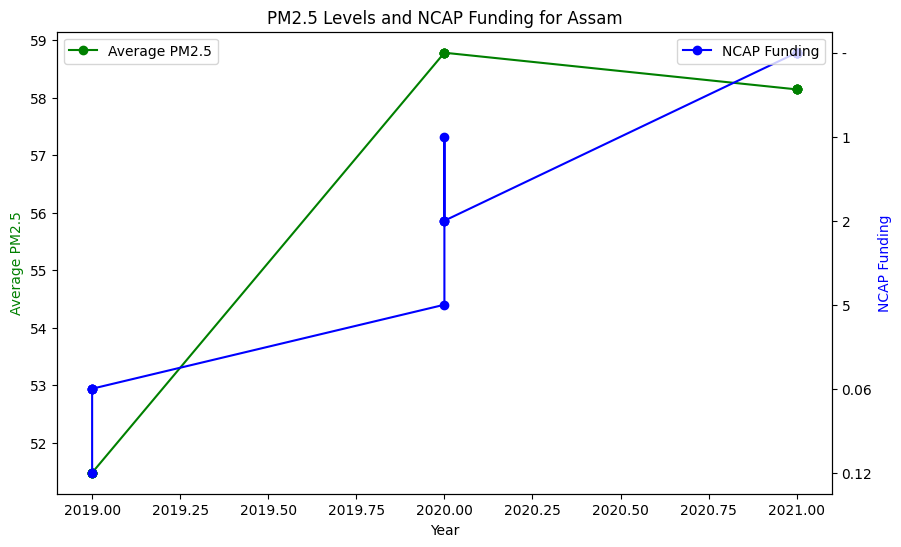

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df = pd.read_csv("Data.csv")
ncap_df = pd.read_csv("NCAP_Funding.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], dayfirst=True, errors='coerce')

# Filter data for Assam
assam_data = df[df['state'] == 'Assam']

# Extract year from Timestamp
assam_data['Year'] = assam_data['Timestamp'].dt.year

# Calculate average PM2.5 per year
yearly_avg_pm25 = assam_data.groupby('Year')['PM2.5'].mean().reset_index()

# Extract funding data for Assam
assam_funding = ncap_df[ncap_df['State'] == 'Assam'][['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']]
assam_funding = assam_funding.melt(var_name='Year', value_name='Funding')
assam_funding['Year'] = assam_funding['Year'].str.extract('(\d{4})').astype(int)

# Merge PM2.5 data with funding data
merged_df = pd.merge(yearly_avg_pm25, assam_funding, on='Year')

# Plot the results
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.plot(merged_df['Year'], merged_df['PM2.5'], color='g', marker='o', label='Average PM2.5')
ax2.plot(merged_df['Year'], merged_df['Funding'], color='b', marker='o', label='NCAP Funding')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5', color='g')
ax2.set_ylabel('NCAP Funding', color='b')

plt.title('PM2.5 Levels and NCAP Funding for Assam')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

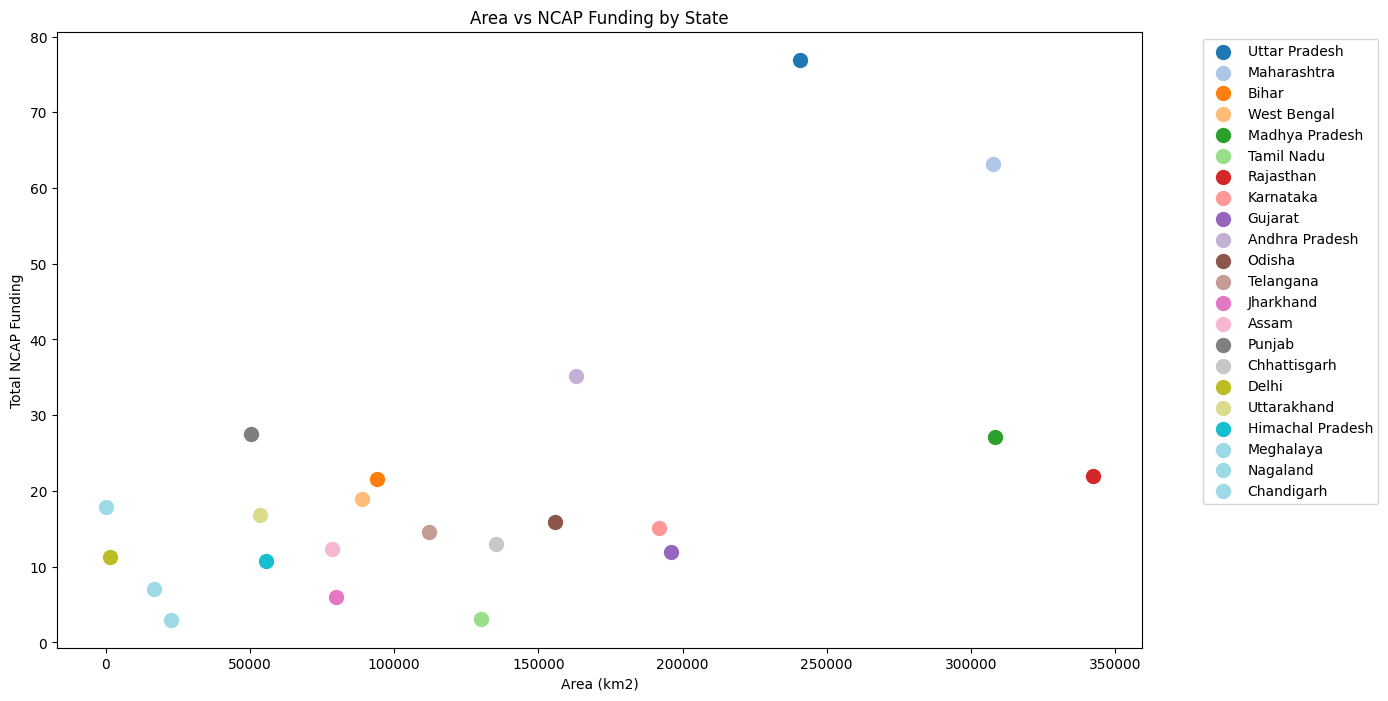

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
state_data = pd.read_csv("State_data.csv")  # Assuming this file contains state data with Population and Area
ncap_df = pd.read_csv("NCAP_Funding.csv")

# Aggregate NCAP funding data by state
ncap_aggregated = ncap_df.groupby('State', as_index=False)['Total fund released'].sum()

# Merge state data with aggregated NCAP funding data
merged_df = pd.merge(state_data, ncap_aggregated, on='State')

# Create a color map for each state
unique_states = merged_df['State'].unique()
colors = plt.cm.tab20(range(len(unique_states)))
color_map = dict(zip(unique_states, colors))

# Plot the results
fig, ax = plt.subplots(figsize=(14, 8))

# Create scatter plot
for state in unique_states:
    state_data = merged_df[merged_df['State'] == state]
    ax.scatter(state_data['Area (km2)'], state_data['Total fund released'], color=color_map[state], s=100, label=state)

# Add labels and title
ax.set_xlabel('Area (km2)')
ax.set_ylabel('Total NCAP Funding')
plt.title('Area vs NCAP Funding by State')

# Add legend
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Miscellaneous questions

In [19]:
import pandas as pd

df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
filtered_df = df[df['Timestamp'].dt.year == 2023]

city_avg_pm25 = filtered_df.groupby('city')['PM2.5'].mean().reset_index()
city_avg_pm25.columns = ['City', 'Average_PM2.5']
most_polluted_city = city_avg_pm25.loc[city_avg_pm25['Average_PM2.5'].idxmax()]['City']

city_data = filtered_df[filtered_df['city'] == most_polluted_city]
hazardous_days = city_data[city_data['PM2.5'] > 300]['Timestamp'].dt.date.nunique()
total_days = city_data['Timestamp'].dt.date.nunique()
percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of days with PM2.5 levels above 300 μg/m³: {percentage_hazardous_days:.2f}%")

Most polluted city in 2023: Darbhanga
Percentage of days with PM2.5 levels above 300 μg/m³: 0.82%


/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_68428/989089800.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
/var/folders/1h/mqtvs8qd6kbfjkgs026sd7640000gn/T/ipykernel_68428/989089800.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year


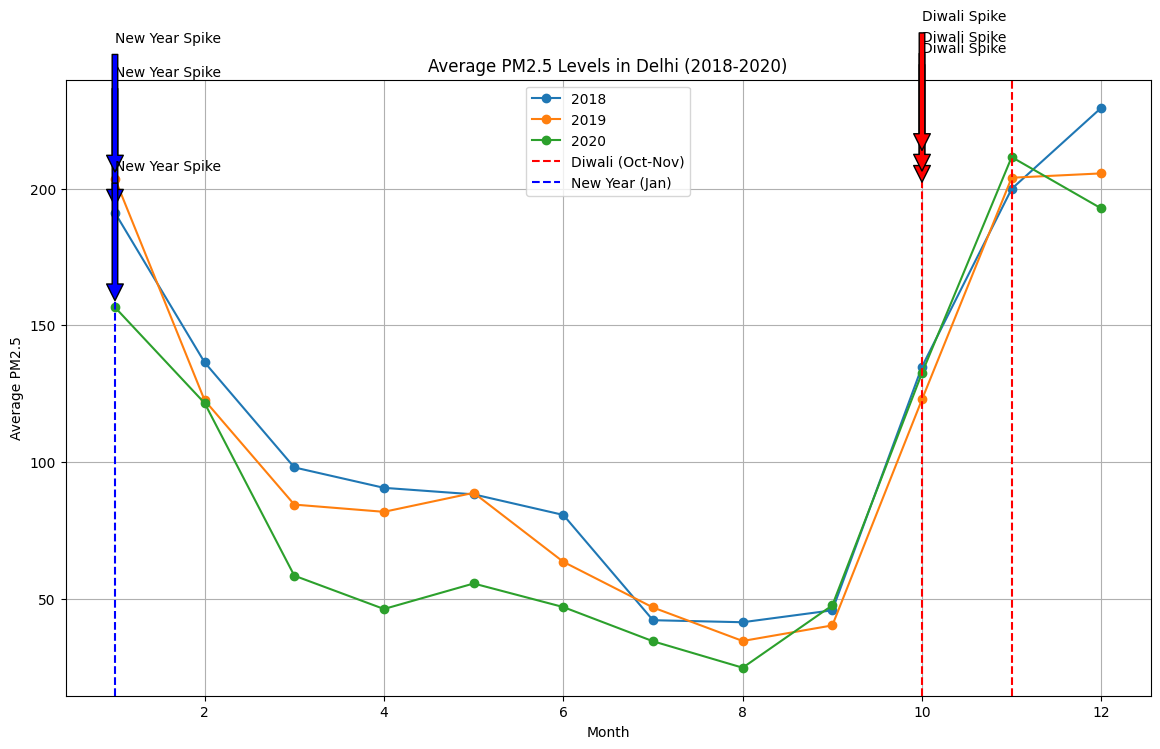

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for the years 2018-2020
filtered_df = df[df['Timestamp'].dt.year.isin([2018, 2019, 2020])]

# Filter data for Delhi
delhi_data = filtered_df[filtered_df['city'] == 'Delhi']

# Extract month and year from Timestamp
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Year'] = delhi_data['Timestamp'].dt.year

# Calculate average PM2.5 per month
monthly_avg_pm25 = delhi_data.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()

# Plot the results
plt.figure(figsize=(14, 8))
for year in [2018, 2019, 2020]:
    year_data = monthly_avg_pm25[monthly_avg_pm25['Year'] == year]
    plt.plot(year_data['Month'], year_data['PM2.5'], marker='o', label=f'{year}')

# Mark Diwali (October-November) and New Year (January)
plt.axvline(x=10, color='r', linestyle='--', label='Diwali (Oct-Nov)')
plt.axvline(x=11, color='r', linestyle='--')
plt.axvline(x=1, color='b', linestyle='--', label='New Year (Jan)')

# Add arrows to indicate spikes
for year in [2018, 2019, 2020]:
    year_data = monthly_avg_pm25[monthly_avg_pm25['Year'] == year]
    diwali_spike = year_data[(year_data['Month'] == 10) | (year_data['Month'] == 11)]['PM2.5'].max()
    new_year_spike = year_data[year_data['Month'] == 1]['PM2.5'].max()
    plt.annotate('Diwali Spike', xy=(10, diwali_spike), xytext=(10, diwali_spike + 50),
                 arrowprops=dict(facecolor='red', shrink=0.05))
    plt.annotate('New Year Spike', xy=(1, new_year_spike), xytext=(1, new_year_spike + 50),
                 arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 Levels in Delhi (2018-2020)')
plt.legend()
plt.grid(True)
plt.show()

State with highest NCAP funding in 2020: Assam


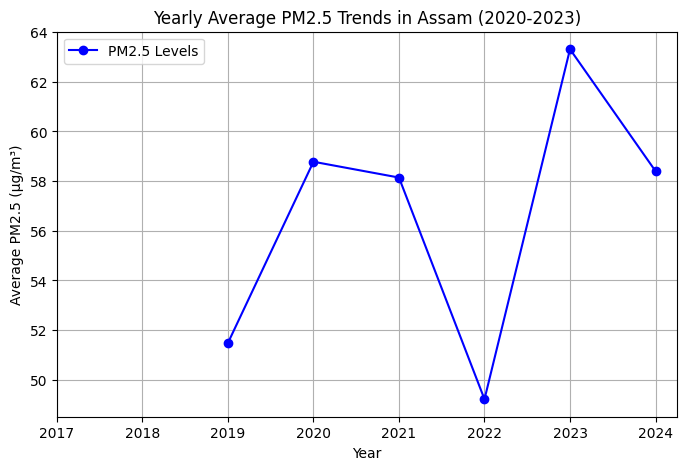

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

ncap_df = pd.read_csv("NCAP_Funding.csv")
ncap_df["Amount released during FY 2020-21"] = pd.to_numeric(ncap_df["Amount released during FY 2020-21"], errors="coerce").fillna(0)
highest_funded_state = ncap_df.loc[ncap_df["Amount released during FY 2020-21"].idxmax(), "State"]
print(f"State with highest NCAP funding in 2020: {highest_funded_state}")

pm25_df = pd.read_csv("Data.csv")
pm25_df['Timestamp'] = pd.to_datetime(pm25_df['Timestamp'], dayfirst=True, errors='coerce')
pm25_df['Year'] = pm25_df['Timestamp'].dt.year
state_pm25 = pm25_df[pm25_df["state"] == highest_funded_state]
yearly_avg_pm25 = state_pm25.groupby("Year")["PM2.5"].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg_pm25["Year"], yearly_avg_pm25["PM2.5"], marker='o', linestyle='-', color='b', label="PM2.5 Levels")

plt.title(f"Yearly Average PM2.5 Trends in {highest_funded_state} (2020-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(yearly_avg_pm25["Year"])
plt.grid(True)
plt.legend()
plt.show()

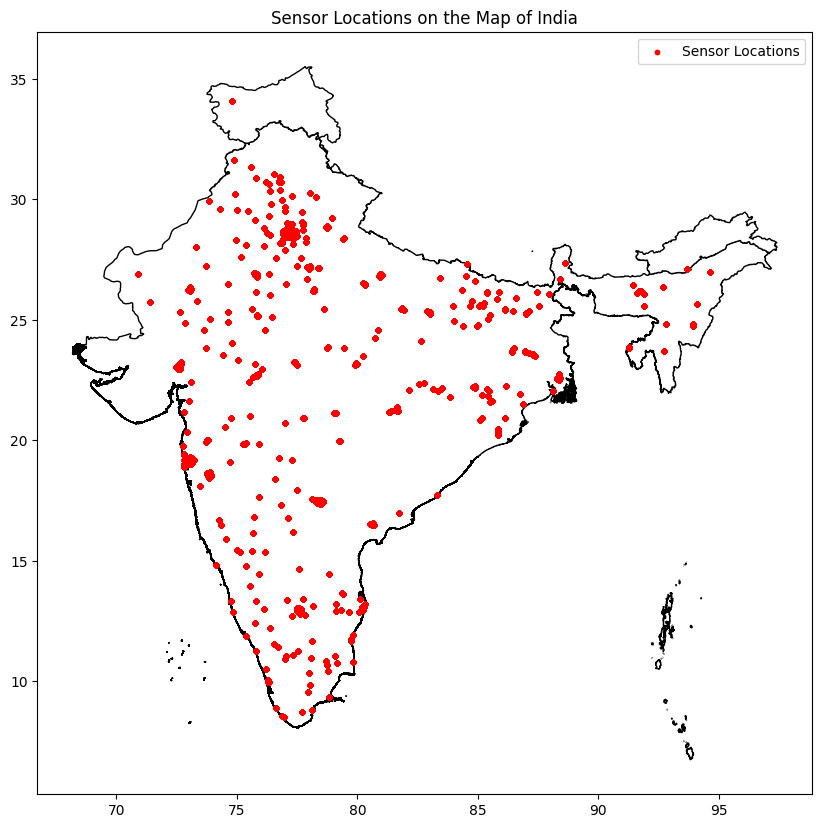

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data.csv")

# Load the shapefile for India
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_0.shp")

# Extract sensor locations (latitude and longitude)
sensor_locations = df[['latitude', 'longitude']].dropna()

# Create a GeoDataFrame for sensor locations
geometry = gpd.points_from_xy(sensor_locations['longitude'], sensor_locations['latitude'])
geo_df = gpd.GeoDataFrame(sensor_locations, geometry=geometry)

# Plot the map of India
fig, ax = plt.subplots(figsize=(10, 10))
india_map.plot(ax=ax, color='white', edgecolor='black')

# Plot the sensor locations
geo_df.plot(ax=ax, markersize=10, color='red', marker='o', label='Sensor Locations')

# Add title and legend
plt.title('Sensor Locations on the Map of India')
plt.legend()
plt.show()

Tell us something new

Average PM2.5 concentration per month in 2023:
    Month  Average_PM2.5
0       1      95.683481
1       2      71.527105
2       3      52.325150
3       4      46.456145
4       5      40.590802
5       6      32.283368
6       7      24.724360
7       8      28.551333
8       9      28.025426
9      10      55.018841
10     11      91.791708
11     12      81.550203


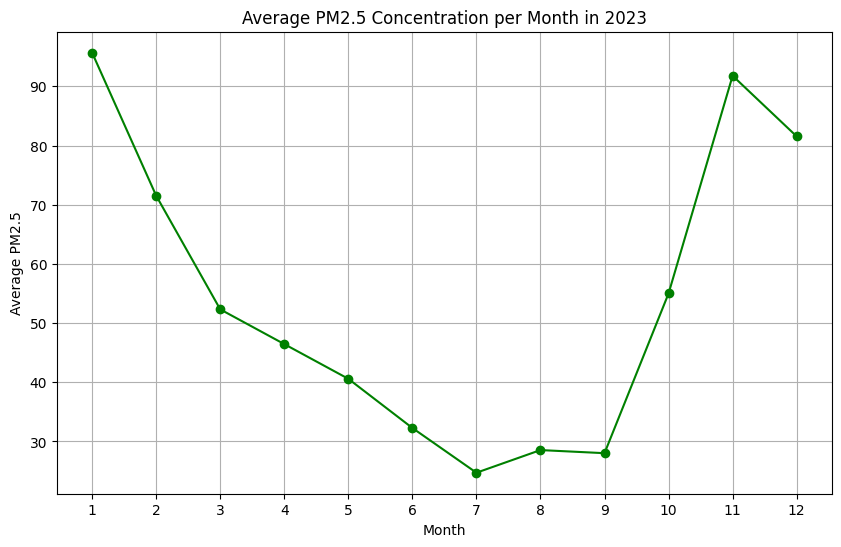

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Data.csv")

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Filter data for the year 2023
filtered_df = df[df['Timestamp'].dt.year == 2023]

# Calculate the average PM2.5 concentration per month
monthly_avg_pm25 = filtered_df.groupby(filtered_df['Timestamp'].dt.month)['PM2.5'].mean().reset_index()
monthly_avg_pm25.columns = ['Month', 'Average_PM2.5']

# Print the results
print("Average PM2.5 concentration per month in 2023:")
print(monthly_avg_pm25)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_pm25['Month'], monthly_avg_pm25['Average_PM2.5'], marker='o', linestyle='-', color='green')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.title('Average PM2.5 Concentration per Month in 2023')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()